In [1]:
import uproot
tree = uproot.lazy('/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/cutflow_studies/presel/NMSSM/NMSSM_XYH_YToHH_6b_MX_700_MY_400_2M/ntuple.root:sixBtree')

In [2]:
# tree = uproot.lazy('/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/cutflow_studies/presel/NMSSM/NMSSM_XYH_YToHH_6b_MX_700_MY_400_2M/ntuple_allsixhj.root:sixBtree')

In [3]:
tree

<Array [{Run: 1, ... PSWeight_var0: 1}] type='1137531 * {"Run": uint32, "LumiSec...'>

In [4]:
all_sixb = tree.nfound_select == 6

In [5]:
ak.sum(all_sixb)

252303

In [6]:
sixb_tree = tree[all_sixb]

(array([1.492703e+06, 2.018000e+04, 8.190000e+02, 9.200000e+01,
        1.800000e+01, 4.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([  20.000038,  246.32875 ,  472.65744 ,  698.98615 ,  925.3149  ,
        1151.6436  , 1377.9723  , 1604.301   , 1830.6296  , 2056.9585  ,
        2283.287   ], dtype=float32),
 <BarContainer object of 10 artists>)

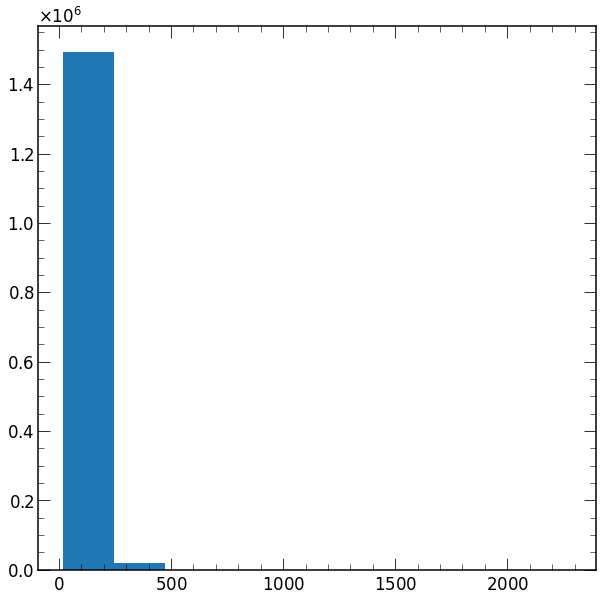

In [7]:
plt.hist(ak.flatten(sixb_tree.jet_pt))

In [8]:

fields = [
    'jet_pt',
    'jet_ptRegressed',
    'jet_eta',
    'jet_phi',
    'jet_m',
    'jet_mRegressed',
    'jet_signalId',
    'jet_btag',
    'X_m',
    'X_pt',
]

branches = {
    field:sixb_tree[field]
    for field in fields
}

In [9]:
branches.keys()

dict_keys(['jet_pt', 'jet_ptRegressed', 'jet_eta', 'jet_phi', 'jet_m', 'jet_mRegressed', 'jet_signalId', 'jet_btag', 'X_m', 'X_pt'])

In [10]:
tmp_output = '/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/cutflow_studies/presel/NMSSM/NMSSM_XYH_YToHH_6b_MX_700_MY_400_2M/ntuple_allsixhj.root'
try:
    with uproot.recreate(tmp_output) as f:
        # for key, value in kwargs.items():
            # f[key] = value
        f['sixBtree']=branches
        # print("f.mktree()")
        # f.mktree('sixBtree', types)
        # print("f.extend(tree)")
        # f['sixBtree'].extend(masked_tree)
except ValueError:
    ...

In [4]:
fields = tree.fields

fields = [
    'jet_pt',
    'jet_ptRegressed',
    'jet_eta',
    'jet_phi',
    'jet_m',
    'jet_signalId',
]

types = dict()
option_fields = []
for field in fields:
    types[field] = tree.type.type[field]
    
    if "?" in str(types[field]):
        option_fields.append(field)

In [5]:
higgs_id = np.column_stack((
    tree.HX_b1_genHflag.to_numpy(),
    tree.HX_b2_genHflag.to_numpy(),
    tree.H1_b1_genHflag.to_numpy(),
    tree.H1_b2_genHflag.to_numpy(),
    tree.H2_b1_genHflag.to_numpy(),
    tree.H2_b2_genHflag.to_numpy(),
))
higgs_id


array([[ 1,  1,  0,  0,  2,  2],
       [ 0,  0,  1,  2, -1, -1],
       [ 1,  1,  0,  0, -1,  2],
       ...,
       [ 0,  2, -1,  0,  1,  2],
       [ 1,  1,  0,  0,  2,  2],
       [ 0, -1,  1,  2, -1,  1]], dtype=int32)

In [6]:
all_sixb = tree.nfound_select == 6

In [7]:
masked_tree = tree[all_sixb]

(array([1.55814e+05, 8.39510e+04, 1.11390e+04, 1.10000e+03, 2.16000e+02,
        6.00000e+01, 1.30000e+01, 8.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([ 20.003326, 110.358696, 200.71407 , 291.06943 , 381.4248  ,
        471.78015 , 562.13556 , 652.4909  , 742.84625 , 833.20166 ,
        923.557   ], dtype=float32),
 <BarContainer object of 10 artists>)

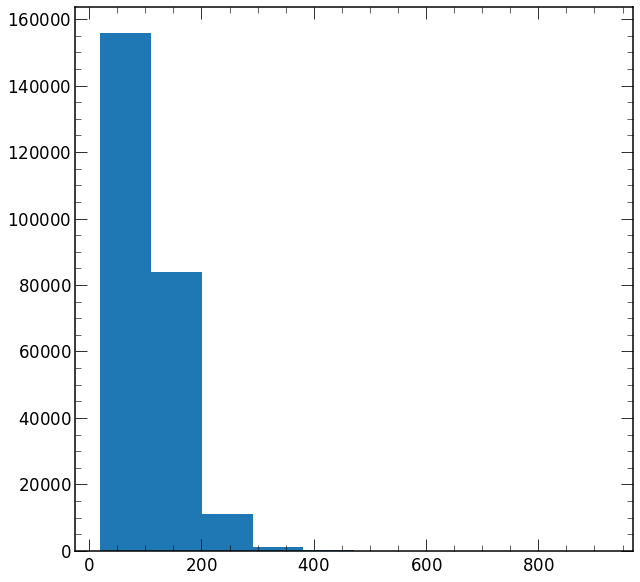

In [8]:
plt.hist(masked_tree.jet_pt[:,0])

In [9]:
masked_tree.jet_pt

<Array [[64.1, 232, 134, ... 35, 62.9, 40.1]] type='252303 * var * float32'>

In [12]:
fields

['jet_pt', 'jet_ptRegressed', 'jet_eta', 'jet_phi', 'jet_m', 'jet_signalId']